In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import sklearn as sk
from sklearn import datasets, linear_model

# Задача 1

$$L(\mu,\sigma) = \prod\limits_{n = 1}p_i(x)\longrightarrow \text{max}_{\mu,\sigma}\;\;\;\;\;\;p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
1) $$l = \ln(L) = \ln\left(\frac{1}{(2\pi\sigma^2)^{n/2}}\right)-\sum\limits_i^n\frac{(x_i-\mu)^2}{2\sigma^2} = -\frac{n}{2}\ln(2\pi\sigma^2)-\sum\limits_i^n\frac{(x_i-\mu)^2}{2\sigma^2}$$
2) * $$\frac{\partial}{\partial \sigma}l = -\frac{n\sigma}{\sigma^2} + \sum\limits_{i=1}^n\frac{(x_i-mu)^2}{\sigma^3} = 0$$
      $$\sigma^2 = \frac{\sum\limits_{i=1}^n(x_i-\mu)^2}{n}$$
   * $$\frac{\partial}{\partial \mu}l = \frac{1}{2\sigma^2}\sum\limits_i^n2(\mu-x_i) = 0$$
      $$n\mu - \sum\limits_{i=1}^nx_i = 0$$
      $$\mu = \frac{\sum\limits_{i=1}^nx_i}{n} = \overline{x}$$

# Задача 2

$$P_{\lambda}(n) = \frac{\lambda^n}{n!}e^{-\lambda}$$

Используя теорему Байеса, получаем:
1) $\rho(\lambda|m) = \frac{p(m|\lambda)\rho(\lambda)}{\int\limits_0^{\infty}p(m|\lambda)\rho(\lambda)d\lambda} \approx = \frac{p(m|\lambda)\rho(0)}{\int\limits_0^{\infty}p(m|\lambda)\rho(0)d\lambda} = \frac{p(m|\lambda)}{\int\limits_0^{\infty}p(m|\lambda)d\lambda} = \frac{\lambda^m}{m!}e^{-\lambda}\left[\int\limits_{0}^{\infty}\frac{\lambda^m}{m!}e^{-\lambda}d\lambda\right]^{-1} = \frac{\lambda^me^{-\lambda}}{\Gamma(m+1)} = \frac{\lambda^me^{-\lambda}}{m!}$

2) Проводим ещё один опыт, получая $m'$:  $\;\rho(\lambda|m,m') = \frac{P_{\lambda}(m')\rho(\lambda|m)}{\int\limits_{0}^{\infty}d\lambda P_{\lambda}(m')\rho(\lambda|m)} = \lambda^{m + m'}e^{-2\lambda}\left[\int\limits_0^{\infty}d\lambda e^{-2\lambda}\lambda^{m+m'}\right]^{-1} = \lambda^{m + m'}e^{-2\lambda}2^{m+m'+1}\left[\int\limits_0^{\infty}d(2\lambda) e^{-2\lambda}(2\lambda)^{m+m'}\right]^{-1} = \frac{2^{m + m' + 1}}{(m + m')!}\lambda^{m + m'}e^{-2\lambda}$

# Задача 3

1) Рассмотрим два события: А - Петя болеет, B - тест положителен. Следует отметить, что эти два события не независимы. Тогда:
    $$P(A|B) = \frac{P(A\cap B)}{P(B)}$$
    Так как тест даёт верный результат в 99 \% случаев, то: $P(A\cap B) = 10^{-5}*0,99$
    
    Вероятность получить полжительный тест: $P(B) = P(\text{болеет и тест полож}) + P(\text{не болеет и тест полож})= 10^{-5}*0.99 + (1-10^{-5})*0.01\approx0.01$
    Тогда:
    $$P(A|B) = \frac{P(A\cap B)}{P(B)}\approx\frac{10^{-5}}{10^{-2}} = 10^{-3}$$


2) Найдем вероятность, что Петя ,болен, если получил два полож теста:
    $$P((A|B)|B) = \frac{P((A|B)\cap B)}{P(B)}$$
    Посчитаем поточнее:
    $$\begin{cases}P(A|B) = 0,000989\\ P((A|B)\cap B) = P(A|B)*0,99 \\ P(B) \approx 0,01\end{cases} \Longrightarrow P((A|B)|B) \approx 0,098$$

# Задача 5

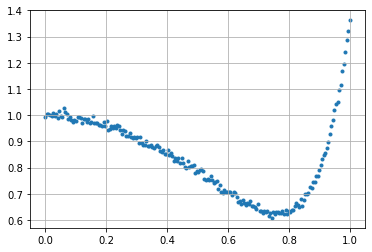

In [3]:
size = 200
x = np.linspace(0,1,size)
y = np.exp(-x**2)+x**10+np.random.normal(0, 0.01, x.shape)
fig, ax = plt.subplots()
ax.scatter(x,y, marker = '.')
ax.grid()
plt.show()

In [69]:
MAX_ORDER = 7
polynomial_features = PolynomialFeatures(MAX_ORDER, include_bias=False)
X = polynomial_features.fit_transform(x.reshape(-1,1))
#отнормируем столбцы матрицы X
Xn = (X-np.mean(X,axis=0))/(np.std(X,axis=0)+0.1)
Xn = np.hstack((np.ones((Xn.shape[0],1)),Xn))
#Возьмём функцию градиентного спуска из семинара A3
def make_L1_regression_grad_descent_iteration(X, y, w, Mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * Mu * np.sign(w)
    w -= alpha * grad
    return w

#Обучение с кросс-валидацией
kf = KFold(n_splits=3)
kf.get_n_splits(Xn, y)
n = 10
mu = np.linspace(0, 0.03, n)
mu_optimum = []
alpha = np.linspace(0, 0.00003, n)
alpha_optimum = []
Norm = []
L = np.zeros((n,n))
for train_index, test_index in kf.split(Xn, y):
    for i in range (len(alpha)):
        for j in range (len(mu)):
            w0 = np.random.normal(0, 0.01, Xn[train_index].shape[1])
            w = make_L1_regression_grad_descent_iteration(Xn[train_index], y[train_index], w0, mu[i], alpha[j])
            for k in range (10000):
                w = make_L1_regression_grad_descent_iteration(Xn[train_index], y[train_index], w, mu[i], alpha[j])
            L[i,j] = np.sum((Xn[train_index] @ w - y[train_index])**2)
    ind = np.argmin(L)
    alpha_opt = alpha[ind-int(ind/n) * n]
    alpha_optimum.append(alpha_opt)
    mu_opt = mu[int(ind/n)]
    mu_optimum.append(mu_opt)
    #теперь применяем модель к тестовой выборке и считаем норму L (потом выберем какая модель лучше минимизирует)
    w1 = np.random.normal(0, 0.01, Xn[test_index].shape[1])
    w = make_L1_regression_grad_descent_iteration(Xn[test_index], y[test_index], w1, mu_opt, alpha_opt)
    for i in range (10000):
           w =  make_L1_regression_grad_descent_iteration(Xn[test_index], y[test_index], w, mu_opt, alpha_opt)
    Norm.append(np.sum((Xn[test_index] @ w - y[test_index])**2))

1)
1)
1)


Найдем минимальную норму и соответствующие ей оптимальные $\mu$ и $\alpha$

In [74]:
min = np.argmin(Norm)
print('оптимальный альфа: ',alpha_optimum[min],'\nоптимальный мю: ',mu_optimum[min])

оптимальный альфа:  3e-05 
оптимальный мю:  0.006666666666666666


Подбор коэффициентов вышел довольно плохо оптимизированным, однако полученные коэффициенты действительно лучше приближают нашу функцию, что видно ниже:

score = 0.0685687974630201


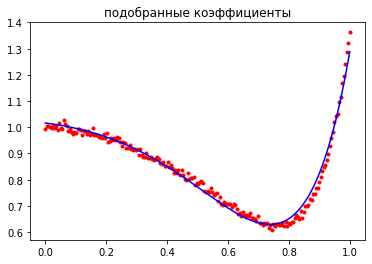

score = 0.19828696395533976


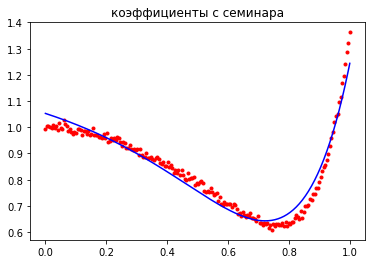

In [76]:
# подобранные коэффициенты
w0 = np.random.normal(0, 0.01, Xn.shape[1])
w = make_L1_regression_grad_descent_iteration(Xn, y, w0, mu_optimum[min], alpha_optimum[min])
for i in range (10000):
      make_L1_regression_grad_descent_iteration(Xn, y, w, mu_optimum[min], alpha_optimum[min])
plt.scatter(x, y, color="r", marker = '.')
plt.plot(x, Xn @ w, color="b")
plt.title('подобранные коэффициенты')
print("score =", np.sum((Xn @ w - y)**2))
plt.show()
#коэффициенты с семинара
w0 = np.random.normal(0, 0.01, Xn.shape[1])
w = make_L1_regression_grad_descent_iteration(Xn, y, w0, 0.01, 0.00001)
for i in range (10000):
      make_L1_regression_grad_descent_iteration(Xn, y, w, 0.01, 0.00001)
plt.scatter(x, y, color="r", marker = '.')
plt.plot(x, Xn @ w, color="b")
plt.title('коэффициенты с семинара')
print("score =", np.sum((Xn @ w - y)**2))
plt.show()

# Задача 6

In [93]:
import sklearn as sk
from sklearn import datasets, linear_model

In [94]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

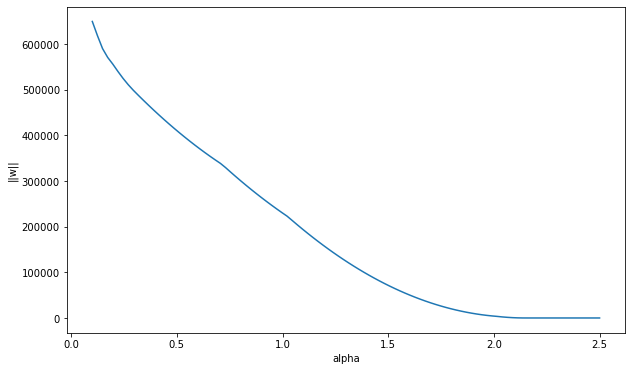

In [101]:
x, y = diabetes.data, diabetes.target
n = 100
mu = np.linspace(0.1, 2.5, n)
w = []
for m in mu:
    l1 = linear_model.Lasso(alpha = m)
    l1.fit(x, y)
    w.append(np.sum(l1.coef_**2))

plt.figure(figsize=(10, 6))
plt.plot(mu, w)
plt.xlabel('alpha')
plt.ylabel('||w||')
plt.show()

# Задача 7

1) Формулировка задачу на лассо Тибширани:
    $$\mathfrak L  =\|Xw-y\|^2 \longrightarrow \text{min}_w,\;\;\;\;\sum\limits_{\alpha}|w_{\alpha}|<C,$$ 
2) Формулирровка задачи Каруша-Куна-Таккера:

    **Постановка задачи:**
    
    Требуется найти значение переменной $x = (x_1...x_n)$ минимизирующее целевую функцию $\text{min}_{x\in X} f(x)$ при наличие ограничений вида $g_i(x) \leq 0,\; i\in\overline{1,m}$

    **Необходимые условия:**

    Если $\hat{x}\in \text{argmin}f$ при наложенных ограничениях, то $\exists \lambda\in\mathfrak{R}^n:$ для $L(x) =f(x) + \sum\limits_{i=1}^m\lambda_ig_i(x)$ выполнено:
    * $\text{min}L(x)= L(\hat x)$
    * $\lambda_ig_i(\hat x) = 0,\;i\in\overline{1,m}$
    * $\lambda_i\geq 0,\;i\in\overline{1,n}$

    **Достаточные условия**

    Необходимые + $\lambda_1 >0$
    

3) Докажем в одну сторону: пусть $\hat{w}$ - минимизирует лассо Тишбирани при наличие гран условия $\sum\limits_{\alpha}|w_{\alpha}| - C <0$. Это эквивалентно выполнению задачи Т-К-Т. Тогда выполнены необходимые условия и $L(\hat w) = \|X\hat w - y\|^2 + \lambda(\sum\limits_{\alpha}|w_{\alpha}| - C) = \text{min}_w L(w)$. А это не что иное, как выполнение задачи L1 регуляризации.

4) Обратно: пусть $\hat{w}$ - решение L1 регуляризаци, т е оно минимизирует функционал $L(w) = \|X w - y\|^2 + \mu(\sum\limits_{\alpha}|w_{\alpha}|)$, где $\mu>0$. Очевидно, что $\hat{w}$ также минимизирует и функционал $L(w) - \mu C$, а это уже задача на лассо Тибширани с $\lambda = \mu\geq 0$